# 1. Importing the Required Libraries

In [78]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns 
import math

pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

# 2. Understanding the Structure of Data

In [79]:
#importing the csv file and reading the data 
file_location = '/Users/mishreebagdai/Downloads/drive-download-20230520T064221Z-001/application_data.csv'
app_df = pd.read_csv(file_location)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [80]:
#yeilds the size of data in terms of rows and columns
app_df.shape

(307511, 122)

In [81]:
#understanding the type of data in each column
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [82]:
#basic statistical details of the data
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# 3. Calculating the missing values

In [83]:
# Calculate the percentage of null values for each column
null_percentage = app_df.isnull().sum() / len(app_df) * 100

# Print the null percentage for each column
print(null_percentage)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [84]:
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop the columns from the DataFrame
df_dropped = app_df.drop(columns=columns_to_drop)

# Print the dropped columns
print(columns_to_drop)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [85]:
#finding the size of the new dataset
df_dropped.shape

(307511, 81)

In [86]:
#printing the first 5 rows
df_dropped.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Calculate the percentage of null values for each column
null_percentage = round(df_dropped.isnull().sum() / len(df_dropped) * 100, 2).sort_values()

# Print the null percentage for each column
print(null_percentage)

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

## 4. Imputation for the following columns where null value percentage ~ 13%
* AMT_REQ_CREDIT_BUREAU_MON       13.50
* AMT_REQ_CREDIT_BUREAU_WEEK      13.50
* AMT_REQ_CREDIT_BUREAU_DAY       13.50
* AMT_REQ_CREDIT_BUREAU_HOUR      13.50
* AMT_REQ_CREDIT_BUREAU_QRT       13.50
* AMT_REQ_CREDIT_BUREAU_YEAR      13.50

**4.1 For the column 'AMT_REQ_CREDIT_BUREAU_MON'**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_MON'>

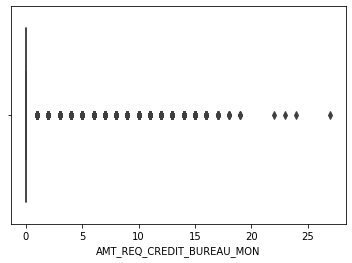

In [88]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_REQ_CREDIT_BUREAU_MON'])

In [89]:
#counting the frequency of each value
df_dropped['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [90]:
#calculating the percentage of each occuring value
df_dropped['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
27.0     0.000376
22.0     0.000376
23.0     0.000376
24.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

The data record of 0 has highest percentage of ~84%, which can be used to fill the missing values

In [91]:
#gathering the statistical data for the column
df_dropped['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

We can infer from the summary that majority of the values contain 0. 
we can either remove the missing values or impute them with the value 0. 
The recommended method for the column 'AMT_REQ_CREDIT_BUREAU_MON' is replace with the highest occuring value, i.e. 0.

**4.2 For the column 'AMT_REQ_CREDIT_BUREAU_WEEK'**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

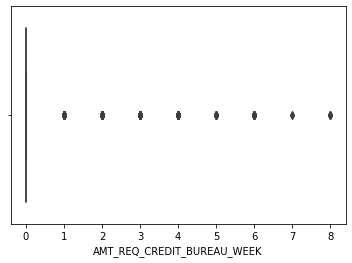

In [92]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_REQ_CREDIT_BUREAU_WEEK'])

In [93]:
#calculating the frequency of each record
df_dropped['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [94]:
#calculating the percentage of each occuring value
df_dropped['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

The data record of 0 has the highest percentage ~97% of occurence.

In [95]:
#gathering the statistical data for the column
df_dropped['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

We can infer from the summary that majority of the values contain 0. we can either remove the missing values or impute them with the value 0. The recommended method for the column 'AMT_REQ_CREDIT_BUREAU_WEEK' is replace with the highest occuring value, i.e. 0.

**4.3 For the column 'AMT_REQ_CREDIT_BUREAU_DAY'**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_DAY'>

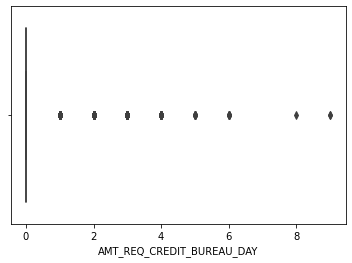

In [96]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_REQ_CREDIT_BUREAU_DAY'])

In [97]:
#calculating the frequency of each record
df_dropped['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [98]:
#calculating the percentage of each occuring value
df_dropped['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [99]:
#gathering the statistical data for the column
df_dropped['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

We can infer from the summary that majority of the values contain 0. we can either remove the missing values or impute them with the value 0. The recommended method for the column 'AMT_REQ_CREDIT_BUREAU_WEEK' is replace with the highest occuring value, i.e. 0.

**4.4 For the column 'AMT_REQ_CREDIT_BUREAU_HOUR'**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

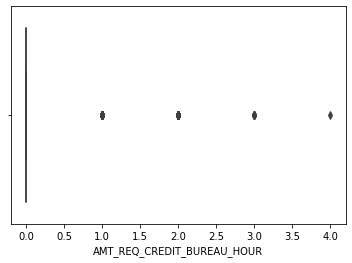

In [100]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_REQ_CREDIT_BUREAU_HOUR'])

In [101]:
#calculating the frequency of each record
df_dropped['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [102]:
#calculating the percentage of each occuring value
df_dropped['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [103]:
#gathering the statistical data for the column
df_dropped['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

We can infer from the summary that majority of the values contain 0. we can either remove the missing values or impute them with the value 0. The recommended method for the column 'AMT_REQ_CREDIT_BUREAU_WEEK' is replace with the highest occuring value, i.e. 0.

**4.5 For the column 'AMT_REQ_CREDIT_BUREAU_QRT'**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

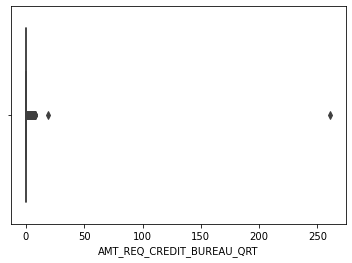

In [104]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_REQ_CREDIT_BUREAU_QRT'])

In [105]:
#calculating the frequency of each record
df_dropped['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [106]:
#calculating the percentage of each occuring value
df_dropped['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
19.0      0.000376
261.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [107]:
#gathering the statistical data for the column
df_dropped['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

We can infer from the summary that majority of the values contain 0. we can either remove the missing values or impute them with the value 0. The recommended method for the column 'AMT_REQ_CREDIT_BUREAU_WEEK' is replace with the highest occuring value, i.e. 0.

**4.6 For the column 'AMT_REQ_CREDIT_BUREAU_YEAR'**

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

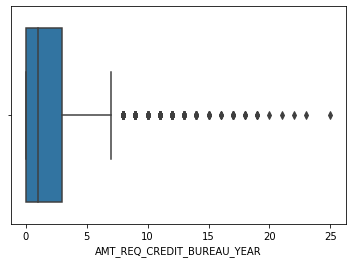

In [108]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [109]:
#calculating the frequency of each record
df_dropped['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [110]:
#calculating the percentage of each occuring value
df_dropped['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
18.0     0.001504
19.0     0.001504
16.0     0.001128
25.0     0.000376
21.0     0.000376
22.0     0.000376
20.0     0.000376
23.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [111]:
#gathering the statistical data for the column
df_dropped['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

As we can see that the values 0,1,2 & 3 have occured significant number of times and hence imputing the missing values with the mode or any other value can create significant changes in the result. Therefore the best method will be to remove these rows completely. 

# 5. Checking for incorrect data types

In [112]:
df_dropped.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


We can see that all the data types are correct and there is no discrepancy in the datatype.

# 6. Identifying Outliers

For the outlier analysis I will focus on the following columns
* AMT_GOODS_PRICE
* AMT_INCOME_TOTAL                
* AMT_CREDIT                      
* AMT_ANNUITY                                      

### 6.1 Outlier analysis for the column 'AMT_GOODS_PRICE'

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

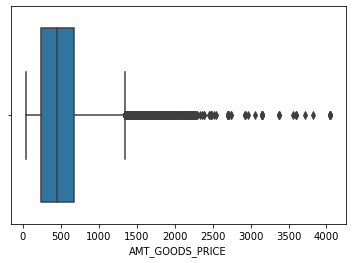

In [113]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_GOODS_PRICE']/1000)

In [114]:
#gathering the statistical data
(df_dropped['AMT_GOODS_PRICE']/1000).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [115]:
#calcultaing the upper limit
IQR_AMT_GOODS_PRICE = (df_dropped['AMT_GOODS_PRICE']/1000).quantile(0.75)-(df_dropped['AMT_GOODS_PRICE']/1000).quantile(0.25)
UL_AMT_GOODS_PRICE = IQR_AMT_GOODS_PRICE*1.5 + (df_dropped['AMT_GOODS_PRICE']/1000).quantile(0.75)
UL_AMT_GOODS_PRICE

1341.0

In [116]:
#finding the percentage of outliers
round(len(df_dropped[(df_dropped['AMT_GOODS_PRICE']/1000)>UL_AMT_GOODS_PRICE])/len(df_dropped)*100,2)

4.79

From the following analysis, we can infer that there are 4.79% of the values which are outliers and in order to remove them we can CAP them at the upper limit of AMT_GOODS_PRICE.

### 6.2 Outlier analysis for the column 'AMT_INCOME_TOTAL'

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

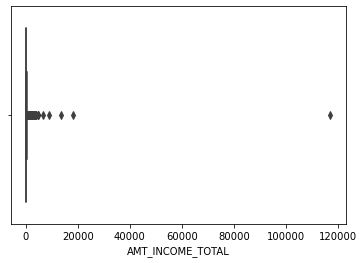

In [117]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_INCOME_TOTAL']/1000)

In [118]:
#gathering the statistical data
(df_dropped['AMT_INCOME_TOTAL']/1000).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [119]:
#calcultaing the upper limit
IQR_AMT_INCOME_TOTAL = (df_dropped['AMT_INCOME_TOTAL']/1000).quantile(0.75)-(df_dropped['AMT_INCOME_TOTAL']/1000).quantile(0.25)
UL_AMT_INCOME_TOTAL = IQR_AMT_INCOME_TOTAL*1.5 + (df_dropped['AMT_INCOME_TOTAL']/1000).quantile(0.75)
UL_AMT_INCOME_TOTAL

337.5

In [120]:
#finding the percentage of outliers
round(len(df_dropped[(df_dropped['AMT_INCOME_TOTAL']/1000)>UL_AMT_INCOME_TOTAL])/len(df_dropped)*100,2)

4.56

From the following analysis, we can infer that there are 4.56% of the values which are outliers and in order to remove them we can CAP them at the upper limit of AMT_INCOME_TOTAL.

### 6.3 Outlier analysis for the column 'AMT_CREDIT'

<AxesSubplot:xlabel='AMT_CREDIT'>

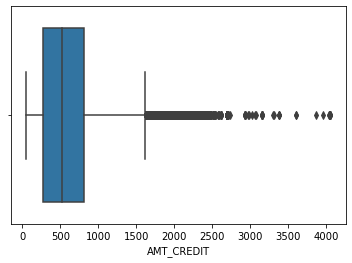

In [121]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_CREDIT']/1000)

In [122]:
#gathering the statistical data
(df_dropped['AMT_CREDIT']/1000).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [123]:
#calcultaing the upper limit
IQR_AMT_CREDIT = (df_dropped['AMT_CREDIT']/1000).quantile(0.75)-(df_dropped['AMT_CREDIT']/1000).quantile(0.25)
UL_AMT_CREDIT = IQR_AMT_CREDIT*1.5 + (df_dropped['AMT_CREDIT']/1000).quantile(0.75)
UL_AMT_CREDIT

1616.625

In [124]:
#finding the percentage of outliers
round(len(df_dropped[(df_dropped['AMT_CREDIT']/1000)>UL_AMT_CREDIT])/len(df_dropped)*100,2)

2.13

From the following analysis, we can infer that there are 2.13% of the values which are outliers and in order to remove them we can CAP them at the upper limit of AMT_INCOME_TOTAL.

### 6.4 Outlier analysis for the column 'AMT_ANNUITY'

<AxesSubplot:xlabel='AMT_ANNUITY'>

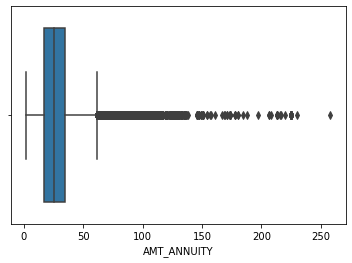

In [125]:
#creating a boxplot to identify outliers
sns.boxplot(df_dropped['AMT_ANNUITY']/1000)

In [126]:
#gathering the statistical data
(df_dropped['AMT_ANNUITY']/1000).describe()

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

In [127]:
#calcultaing the upper limit
IQR_AMT_ANNUITY = (df_dropped['AMT_ANNUITY']/1000).quantile(0.75)-(df_dropped['AMT_ANNUITY']/1000).quantile(0.25)
UL_AMT_ANNUITY = IQR_AMT_ANNUITY*1.5 + (df_dropped['AMT_ANNUITY']/1000).quantile(0.75)
UL_AMT_ANNUITY

61.70399999999999

In [128]:
#finding the percentage of outliers
round(len(df_dropped[(df_dropped['AMT_ANNUITY']/1000)>UL_AMT_ANNUITY])/len(df_dropped)*100,2)

2.44

From the following analysis, we can infer that there are 2.44% of the values which are outliers and in order to remove them we can CAP them at the upper limit of AMT_INCOME_TOTAL.

# 7. Checking Data Imbalance

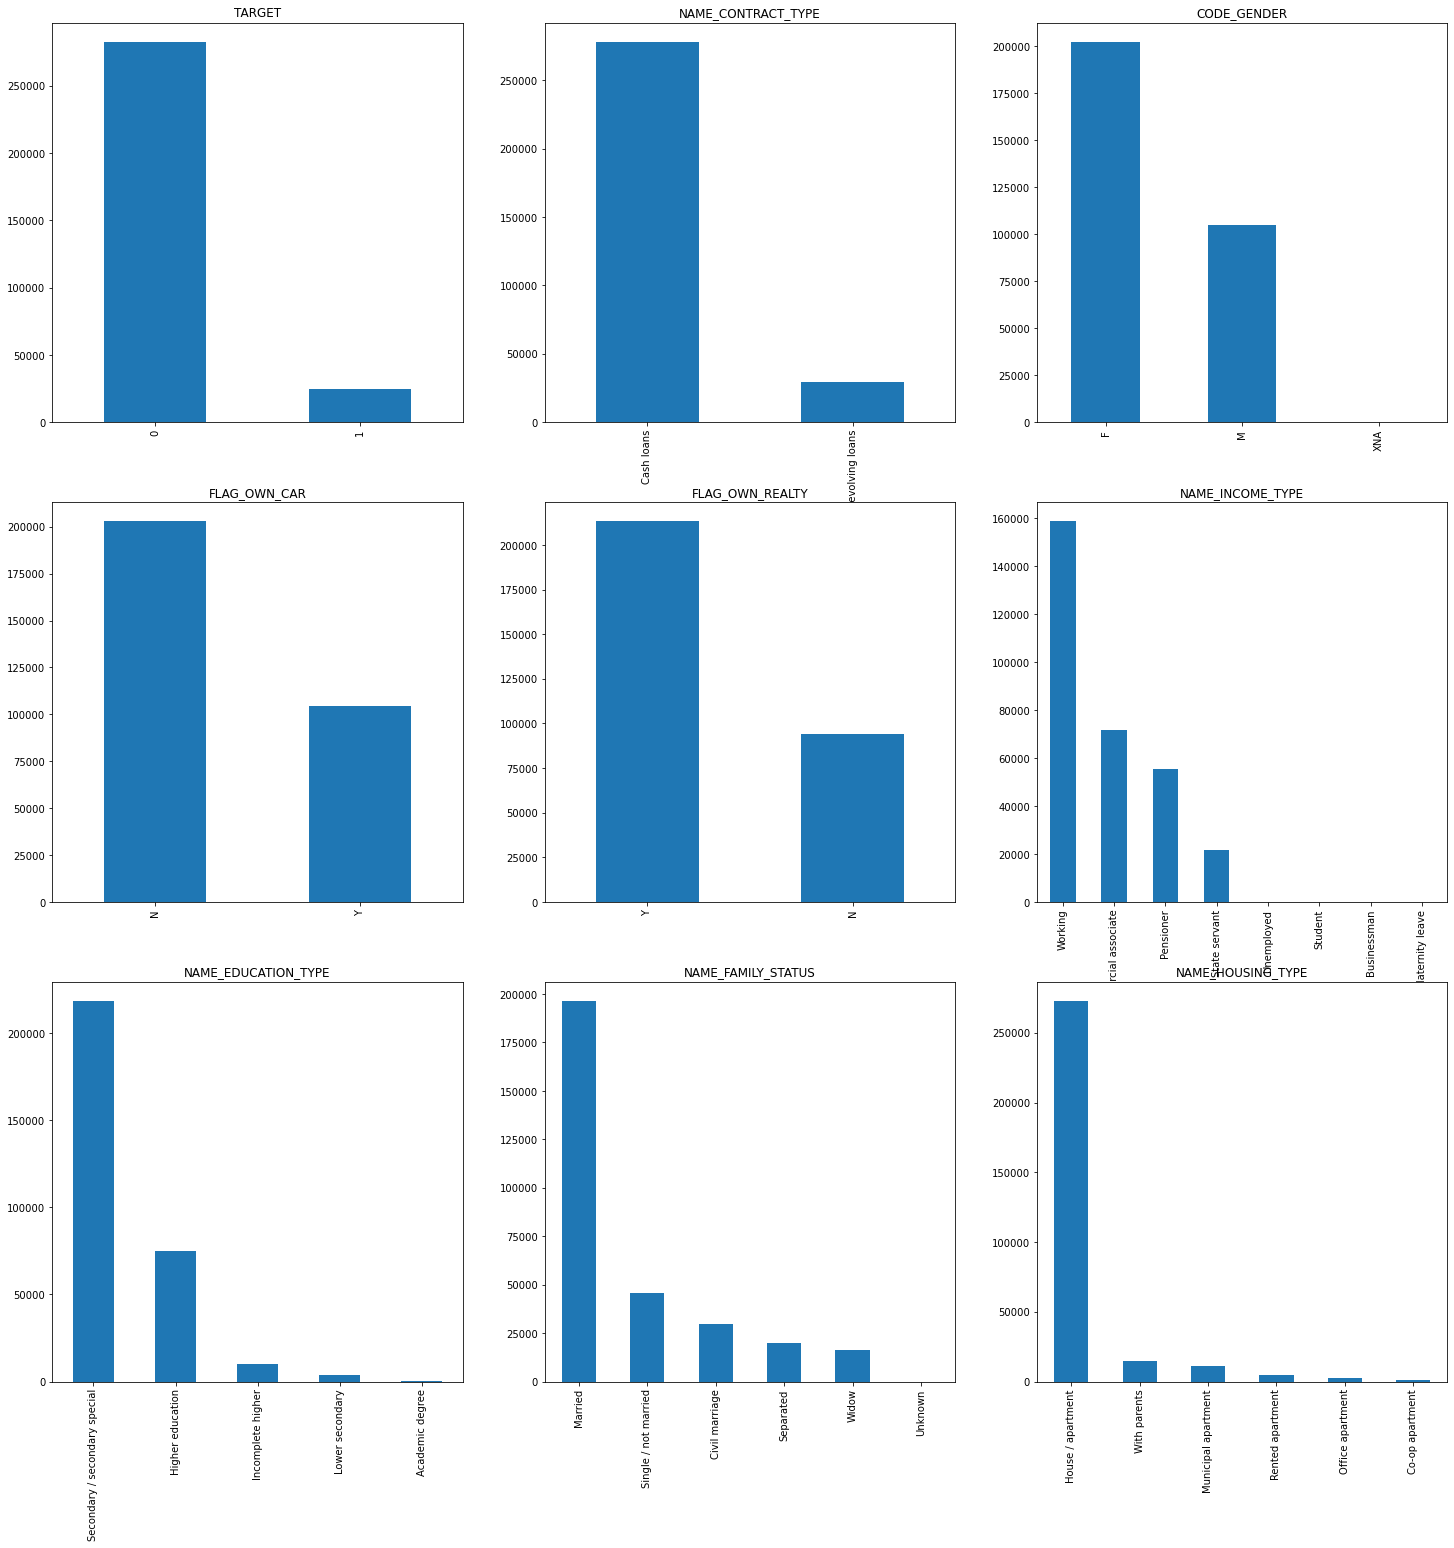

In [129]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(25,25))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_dropped[col].value_counts().plot(kind='bar');
    plt.title(col)

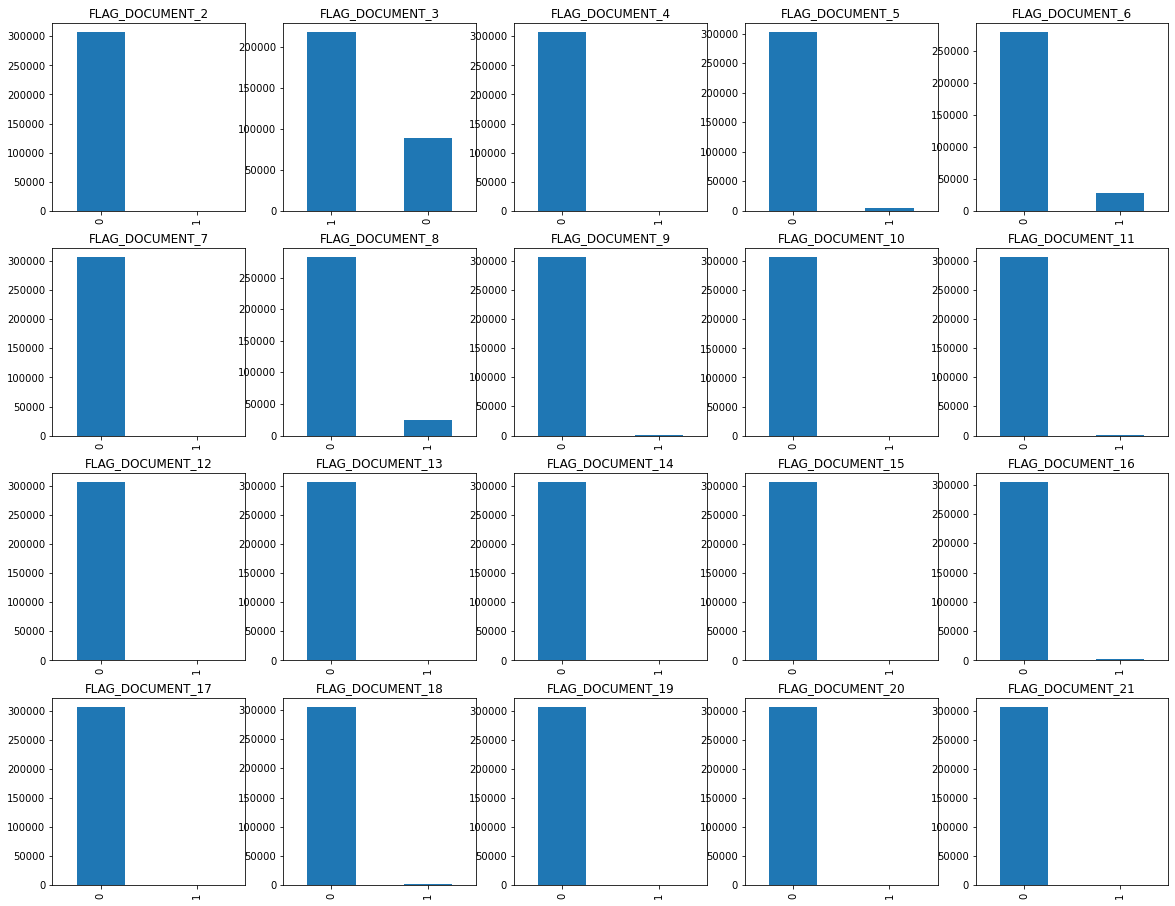

In [130]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(20,20))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    df_dropped[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

# 8. Correlation analysis

In [131]:
#dividing the dataset into two wrt the target variable
df_target1 = df_dropped[df_dropped['TARGET'] == 1]
df_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
df_target0 = df_dropped[df_dropped['TARGET'] == 0]
df_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [133]:
corr_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
df_corr_t1 = df_target1[corr_columns]
df_corr_t1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120
26,112500.0,979992.0,27076.5,702000.0,-18724,-2628,-6573.0,-1827
40,202500.0,1193580.0,35028.0,855000.0,-17482,-1262,-1182.0,-1029
42,135000.0,288873.0,16258.5,238500.0,-13384,-3597,-45.0,-4409
81,81000.0,252000.0,14593.5,252000.0,-24794,365243,-5391.0,-4199


In [134]:
df_corr_t1.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,0.003096,-0.014979,0.000158,-0.004215
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,-0.135316,-0.000968,-0.025854,-0.052329
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,-0.014303,-0.082552,0.034279,-0.016767
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,-0.135810,0.003587,-0.025679,-0.056086
DAYS_BIRTH,0.003096,-0.135316,-0.014303,-0.135810,1.000000,-0.575097,0.289114,0.252863
DAYS_EMPLOYED,-0.014979,-0.000968,-0.082552,0.003587,-0.575097,1.000000,-0.188929,-0.226470
DAYS_REGISTRATION,0.000158,-0.025854,0.034279,-0.025679,0.289114,-0.188929,1.000000,0.096833
DAYS_ID_PUBLISH,-0.004215,-0.052329,-0.016767,-0.056086,0.252863,-0.226470,0.096833,1.000000


<AxesSubplot:>

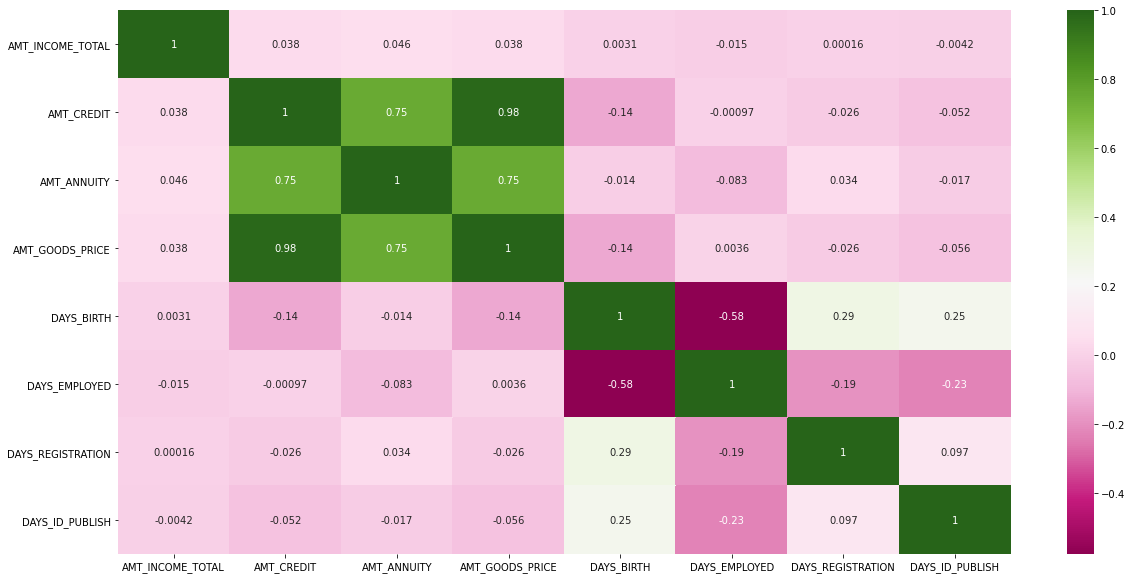

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr_t1.corr(),cmap="PiYG",annot=True)

In [136]:
df_corr_t0 = df_dropped[corr_columns]
df_corr_t0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120
1,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291
2,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260.0,-2531
3,135000.0,312682.5,29686.5,297000.0,-19005,-3039,-9833.0,-2437
4,121500.0,513000.0,21865.5,513000.0,-19932,-3038,-4311.0,-3458


In [137]:
df_corr_t0.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159610,0.027261,-0.064223,0.027805,0.008506
AMT_CREDIT,0.156870,1.000000,0.770138,0.986968,-0.055436,-0.066838,0.009621,-0.006575
AMT_ANNUITY,0.191657,0.770138,1.000000,0.775109,0.009445,-0.104332,0.038514,0.011268
AMT_GOODS_PRICE,0.159610,0.986968,0.775109,1.000000,-0.053442,-0.064842,0.011565,-0.009267
DAYS_BIRTH,0.027261,-0.055436,0.009445,-0.053442,1.000000,-0.615864,0.331912,0.272691
DAYS_EMPLOYED,-0.064223,-0.066838,-0.104332,-0.064842,-0.615864,1.000000,-0.210242,-0.272378
DAYS_REGISTRATION,0.027805,0.009621,0.038514,0.011565,0.331912,-0.210242,1.000000,0.101896
DAYS_ID_PUBLISH,0.008506,-0.006575,0.011268,-0.009267,0.272691,-0.272378,0.101896,1.000000


<AxesSubplot:>

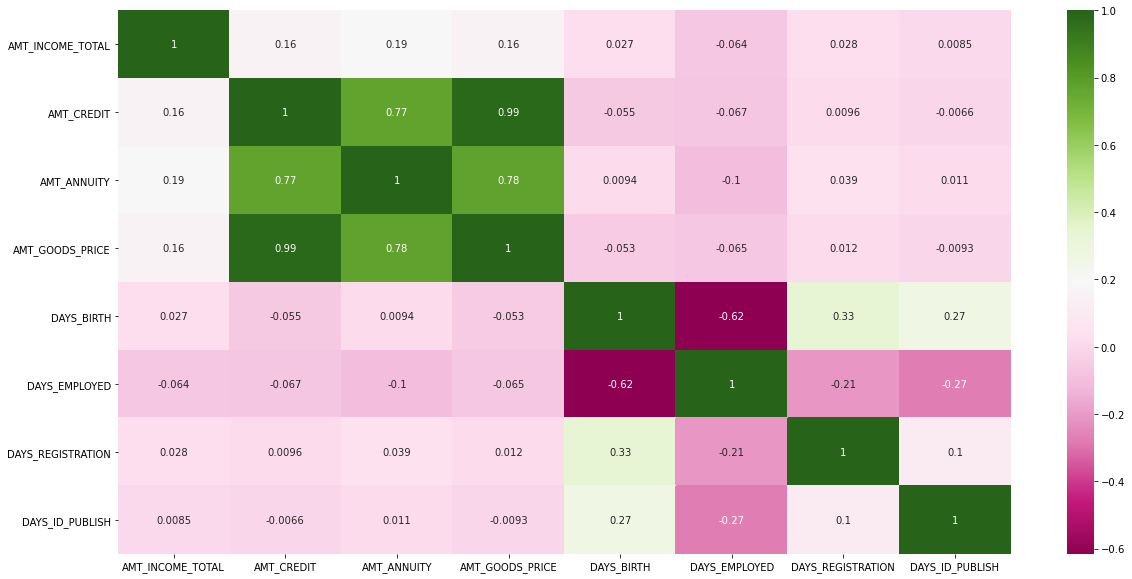

In [138]:
plt.figure(figsize = (20,10))
sns.heatmap(df_corr_t0.corr(),cmap="PiYG",annot=True)

In [139]:
top_correlations_payment_difficulties = df_corr_t1.corr().unstack().sort_values(ascending=False).drop_duplicates()
top_correlations_other_cases = df_corr_t0.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Print the top correlations for each segment
print("Top correlations for 'Client with payment difficulties':")
print(top_correlations_payment_difficulties.head(10))

print("\nTop correlations for 'Other cases':")
print(top_correlations_other_cases.head(10))

Top correlations for 'Client with payment difficulties':
AMT_INCOME_TOTAL   AMT_INCOME_TOTAL     1.000000
AMT_GOODS_PRICE    AMT_CREDIT           0.983103
AMT_ANNUITY        AMT_GOODS_PRICE      0.752699
AMT_CREDIT         AMT_ANNUITY          0.752195
DAYS_REGISTRATION  DAYS_BIRTH           0.289114
DAYS_ID_PUBLISH    DAYS_BIRTH           0.252863
                   DAYS_REGISTRATION    0.096833
AMT_INCOME_TOTAL   AMT_ANNUITY          0.046421
AMT_CREDIT         AMT_INCOME_TOTAL     0.038131
AMT_GOODS_PRICE    AMT_INCOME_TOTAL     0.037583
dtype: float64

Top correlations for 'Other cases':
AMT_INCOME_TOTAL   AMT_INCOME_TOTAL    1.000000
AMT_CREDIT         AMT_GOODS_PRICE     0.986968
AMT_ANNUITY        AMT_GOODS_PRICE     0.775109
                   AMT_CREDIT          0.770138
DAYS_REGISTRATION  DAYS_BIRTH          0.331912
DAYS_ID_PUBLISH    DAYS_BIRTH          0.272691
AMT_ANNUITY        AMT_INCOME_TOTAL    0.191657
AMT_GOODS_PRICE    AMT_INCOME_TOTAL    0.159610
AMT_INCOME_TOTAL 

In [140]:
income_new = df_dropped['AMT_INCOME_TOTAL']/1000

In [141]:
income_new.describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 1.0, 'Non Defaulters')

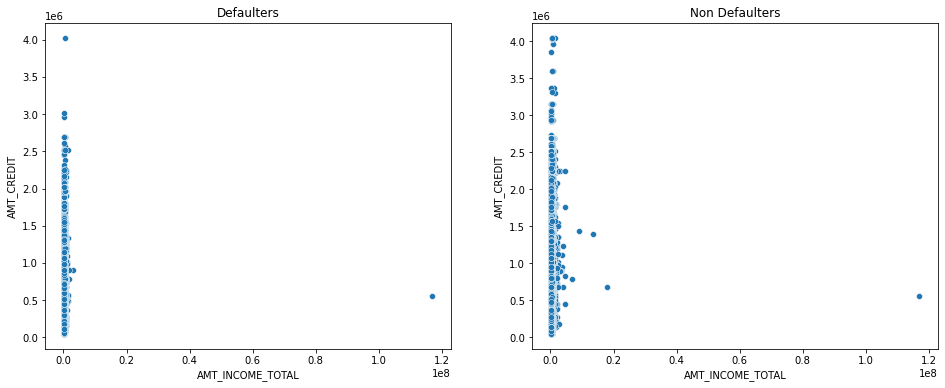

In [142]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT', data=df_corr_t1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT', data=df_corr_t0)
plt.title('Non Defaulters')